# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
Cloudiness = []
Country = []
Date =  []      
Humidity = []
Lat   = []
Lng    = []
MaxTemp  =[]
WindSpeed =[]
citi = []

In [41]:
#citi = ["New York City","Chicago","Greterlcity"]
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
counter = 0
set = 1



# Build query URL and request your results in Celsius
for city in cities:
                   
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    #print (query_url)
    if counter >= 50 :
        print("sleeping........")
        time.sleep(5)
        counter = 0
        set = set +1
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        citi.append(weather_json["name"])
        Cloudiness.append(weather_json["clouds"]["all"])
        Country.append(weather_json["sys"]["country"])
        Date.append(weather_json["dt"])
        Humidity.append(weather_json["main"]["humidity"])
        Lat.append(weather_json["coord"]["lat"])
        Lng.append(weather_json["coord"]["lon"])
        MaxTemp.append(weather_json["main"]["temp_max"])
        WindSpeed.append(weather_json["wind"]["speed"])
        
        print(f"Processing Record {counter} of Set {set} | {city}")

        counter = counter + 1
            
    except(KeyError, IndexError):
         print("City not found ... skipping.")




print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

City not found ... skipping.
Processing Record 0 of Set 1 | davila
City not found ... skipping.
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | jizan
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | riyadh
Processing Record 8 of Set 1 | manbij
Processing Record 9 of Set 1 | farafangana
Processing Record 10 of Set 1 | shelbyville
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | port alfred
City not found ... skipping.
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | mazamari
Processing Record 20 of Set 1 | beringovskiy
Processing Record 21 of Set 1 | south yarmouth
Processi

Processing Record 34 of Set 4 | najran
Processing Record 35 of Set 4 | iranshahr
Processing Record 36 of Set 4 | makakilo city
Processing Record 37 of Set 4 | kaffrine
Processing Record 38 of Set 4 | bathsheba
Processing Record 39 of Set 4 | palmer
Processing Record 40 of Set 4 | vestmanna
Processing Record 41 of Set 4 | kisangani
Processing Record 42 of Set 4 | inuvik
Processing Record 43 of Set 4 | sturgis
Processing Record 44 of Set 4 | progreso
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | aden
City not found ... skipping.
Processing Record 47 of Set 4 | natal
Processing Record 48 of Set 4 | auki
Processing Record 49 of Set 4 | esperance
sleeping........
Processing Record 0 of Set 5 | souillac
Processing Record 1 of Set 5 | agirish
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | kemijarvi
Processing Record 4 of Set 5 | milkovo
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | rumford
Processing Record 7 of Set 

Processing Record 24 of Set 8 | merced
Processing Record 25 of Set 8 | sinnamary
Processing Record 26 of Set 8 | burnie
Processing Record 27 of Set 8 | jaciara
Processing Record 28 of Set 8 | margate
City not found ... skipping.
Processing Record 29 of Set 8 | sijunjung
Processing Record 30 of Set 8 | belem
Processing Record 31 of Set 8 | college
Processing Record 32 of Set 8 | vostok
Processing Record 33 of Set 8 | sorrento
Processing Record 34 of Set 8 | skelleftea
Processing Record 35 of Set 8 | myitkyina
Processing Record 36 of Set 8 | chicama
Processing Record 37 of Set 8 | ahipara
Processing Record 38 of Set 8 | tilichiki
Processing Record 39 of Set 8 | angoram
Processing Record 40 of Set 8 | kismayo
Processing Record 41 of Set 8 | banyo
Processing Record 42 of Set 8 | newport
Processing Record 43 of Set 8 | saurimo
Processing Record 44 of Set 8 | vega de alatorre
Processing Record 45 of Set 8 | vammala
Processing Record 46 of Set 8 | ancud
Processing Record 47 of Set 8 | katsuur

Processing Record 7 of Set 12 | sabang
Processing Record 8 of Set 12 | kropotkin
Processing Record 9 of Set 12 | okha
Processing Record 10 of Set 12 | la macarena
Processing Record 11 of Set 12 | tura
Processing Record 12 of Set 12 | todos santos
Processing Record 13 of Set 12 | seydi
Processing Record 14 of Set 12 | kampot
Processing Record 15 of Set 12 | jinji
Processing Record 16 of Set 12 | krasnoselkup
Processing Record 17 of Set 12 | kristianstad
Processing Record 18 of Set 12 | anshun
Processing Record 19 of Set 12 | isangel
City not found ... skipping.
Processing Record 20 of Set 12 | mehamn
Processing Record 21 of Set 12 | san cristobal
Processing Record 22 of Set 12 | devrek
Processing Record 23 of Set 12 | nsoko
City not found ... skipping.
Processing Record 24 of Set 12 | fredonia
Processing Record 25 of Set 12 | deputatskiy
Processing Record 26 of Set 12 | curup
Processing Record 27 of Set 12 | williston
Processing Record 28 of Set 12 | banikoara
Processing Record 29 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
print(f"City      {len(citi)}")
print(f"Cloudiness{len(Cloudiness)}")
print(f"Country   {len(Country)}")
print(f"Date      {len(Date) }")  
print(f"Humidity  {len(Humidity)}")
print(f"Lat       {len(Lat)}")
print(f"Lng       {len(Lng)}")
print(f"Max Temp  {len(MaxTemp)}")
print(f"Wind Speed{len(WindSpeed)}")

City      581
Cloudiness581
Country   581
Date      581
Humidity  581
Lat       581
Lng       581
Max Temp  581
Wind Speed581


In [43]:
City_df = pd.DataFrame({"City": citi,
                       "Cloudiness" : Cloudiness,
                       "Country":Country,
                       "Date": Date,
                       "Humidity": Humidity,
                       "Lat": Lat,
                       "Lng": Lng,
                       "Max Temp": MaxTemp,
                       "Wind Speed": WindSpeed})

City_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Davila,20,PH,1586456680,74,18.47,120.58,78.8,3.36
1,Clyde River,5,CA,1586456681,84,70.47,-68.59,8.6,2.24
2,Hilo,1,US,1586456681,64,19.73,-155.09,77.0,2.73
3,Jizan,2,SA,1586456681,66,17.33,42.67,86.0,4.70
4,Barrow,1,US,1586456405,83,71.29,-156.79,-9.4,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [4]:
# City_df=pd.read_csv("../output_data/city.csv")
# City_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Davila,20,PH,1586456680,74,18.47,120.58,78.8,3.36
1,1,Clyde River,5,CA,1586456681,84,70.47,-68.59,8.6,2.24
2,2,Hilo,1,US,1586456681,64,19.73,-155.09,77.0,2.73
3,3,Jizan,2,SA,1586456681,66,17.33,42.67,86.0,4.70
4,4,Barrow,1,US,1586456405,83,71.29,-156.79,-9.4,11.41


In [8]:
Time1= time.gmtime(int(City_df.iloc[0,4]))
Time1

time.struct_time(tm_year=2020, tm_mon=4, tm_mday=9, tm_hour=18, tm_min=24, tm_sec=40, tm_wday=3, tm_yday=100, tm_isdst=0)

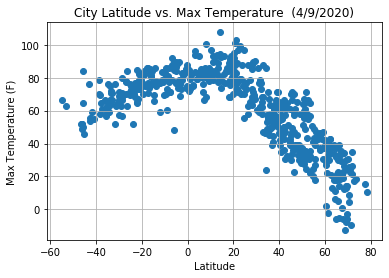

In [12]:
plt.scatter(City_df["Lat"],City_df["Max Temp"])
plt.title(f"City Latitude vs. Max Temperature  ({Time1[1]}/{Time1[2]}/{Time1[0]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../output_data/Lat_Temp.png")

In [ ]:
# Cities between -40 to +40 latitude have hotter temperatures than anywhere else.
#As latitude increases temperature is colder.

#### Latitude vs. Humidity Plot

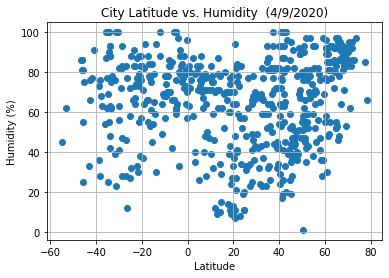

In [14]:
plt.scatter(City_df["Lat"],City_df["Humidity"])
plt.title(f"City Latitude vs. Humidity  ({Time1[1]}/{Time1[2]}/{Time1[0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../output_data/Lat_Hum.png")

In [ ]:
# I am not seeing any relationship, as cities with higher latitude and lower latitude both have high humidity and low humidity.


#### Latitude vs. Cloudiness Plot

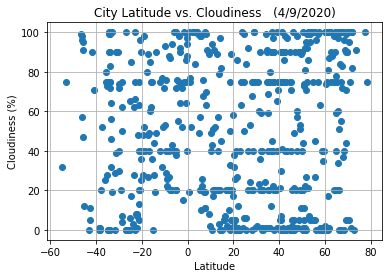

In [15]:
plt.scatter(City_df["Lat"],City_df["Cloudiness"])
plt.title(f"City Latitude vs. Cloudiness   ({Time1[1]}/{Time1[2]}/{Time1[0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../output_data/Lat_Cloud.png")

In [ ]:
#There is not relationship between Latitude and cloudiness

#### Latitude vs. Wind Speed Plot

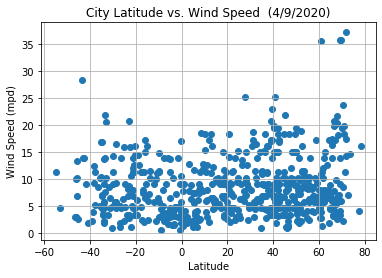

In [16]:
plt.scatter(City_df["Lat"],City_df["Wind Speed"])
plt.title(f"City Latitude vs. Wind Speed  ({Time1[1]}/{Time1[2]}/{Time1[0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpd)")
plt.grid(True)
plt.savefig("../output_data/Lat_Wind.png")

In [ ]:
# Wind speed is same across the lalitude.

## Linear Regression

In [48]:
# OPTIONAL: Create a function to create Linear Regression plots
def regressionfunc(x_values,y_values):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return (slope,intercept,rvalue,pvalue,stderr,regress_values,line_eq)

In [49]:
# Create Northern and Southern Hemisphere DataFrames
North_df = City_df.loc[City_df["Lat"] >= 0]
South_df = City_df.loc[City_df["Lat"]<=0]
South_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
6,Mataura,96,NZ,1586456681,86,-46.19,168.86,52.00,3.00
9,Farafangana,66,MG,1586456543,83,-22.82,47.83,75.56,8.70
11,Rikitea,100,PF,1586456681,67,-23.12,-134.97,75.88,2.89
12,Port Alfred,56,ZA,1586456681,75,-33.59,26.89,70.72,21.94
13,Lüderitz,0,NA,1586456681,77,-26.65,15.16,62.60,13.87
...,...,...,...,...,...,...,...,...,...
552,Zorritos,75,PE,1586456788,33,-3.68,-80.68,89.60,10.29
554,Ibirama,0,BR,1586456788,46,-27.06,-49.52,78.01,1.99
569,Isangel,28,VU,1586456790,71,-19.55,169.27,76.42,14.45
573,Nsoko,100,SZ,1586456790,83,-27.03,31.95,69.80,1.12


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.7588272676438744


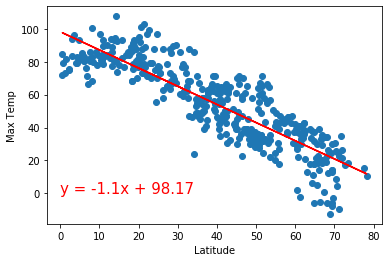

In [68]:
plt.scatter(North_df["Lat"],North_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
re = regressionfunc(North_df["Lat"],North_df["Max Temp"])
rval = re[2]
plt.plot(North_df["Lat"],re[5],"r-")
plt.annotate(re[6],(0,0),fontsize=15,color="red")
print(f"The r-squared is : {rval**2}")
plt.savefig("../output_data/NLat_Temp.png")

In [ ]:
# Negative relashionship between northern hemishphere latitude and teperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.45305520073614025


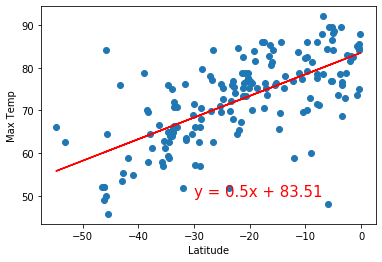

In [69]:
plt.scatter(South_df["Lat"],South_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
re = regressionfunc(South_df["Lat"],South_df["Max Temp"])
rval = re[2]
plt.plot(South_df["Lat"],re[5],"r-")
plt.annotate(re[6],(-30,50),fontsize=15,color="red")
print(f"The r-squared is : {rval**2}")
plt.savefig("../output_data/SLat_Temp.png")

In [ ]:
# Positive relationship between Souther hemishpere and temperature, as the latitude increases temperature increases.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0918381515549407


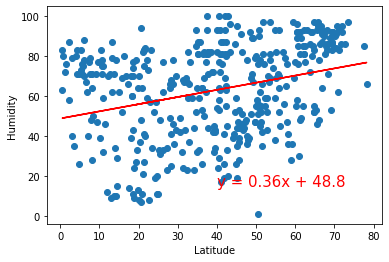

In [70]:
plt.scatter(North_df["Lat"],North_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
re = regressionfunc(North_df["Lat"],North_df["Humidity"])
rval = re[2]
plt.plot(North_df["Lat"],re[5],"r-")
plt.annotate(re[6],(40,15),fontsize=15,color="red")
print(f"The r-squared is : {rval**2}")
plt.savefig("../output_data/NLat_Hum.png")

In [ ]:
#No relationship between northern hemisphere latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.019804102133507955


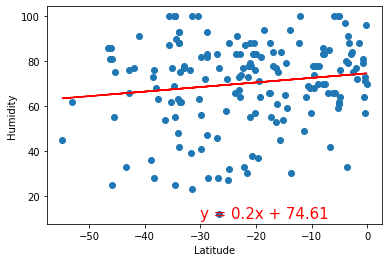

In [71]:
plt.scatter(South_df["Lat"],South_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
re = regressionfunc(South_df["Lat"],South_df["Humidity"])
rval = re[2]
plt.plot(South_df["Lat"],re[5],"r-")
plt.annotate(re[6],(-30,10),fontsize=15,color="red")
print(f"The r-squared is : {rval**2}")
plt.savefig("../output_data/SLat_Hum.png")

In [ ]:
# No relationsip between sourthern hemisphere and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.03135299015194039


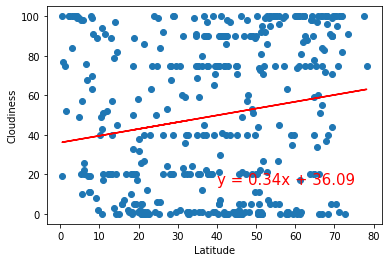

In [72]:
plt.scatter(North_df["Lat"],North_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
re = regressionfunc(North_df["Lat"],North_df["Cloudiness"])
rval = re[2]
plt.plot(North_df["Lat"],re[5],"r-")
plt.annotate(re[6],(40,15),fontsize=15,color="red")
print(f"The r-squared is : {rval**2}")
plt.savefig("../output_data/NLat_Cloud.png")

In [ ]:
# No relationship between Nothern hemisphere and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.017455389799096513


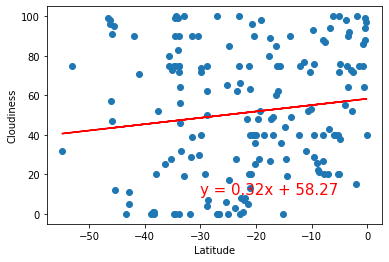

In [73]:
plt.scatter(South_df["Lat"],South_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
re = regressionfunc(South_df["Lat"],South_df["Cloudiness"])
rval = re[2]
plt.plot(South_df["Lat"],re[5],"r-")
plt.annotate(re[6],(-30,10),fontsize=15,color="red")
print(f"The r-squared is : {rval**2}")
plt.savefig("../output_data/SLat_Cloud.png")

In [ ]:
#No relationship between southern hemisphere and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.03634573399141311


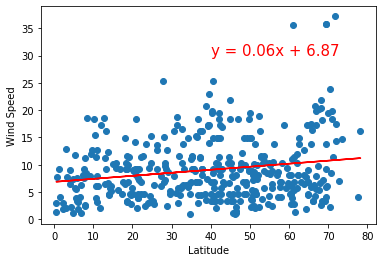

In [74]:
plt.scatter(North_df["Lat"],North_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
re = regressionfunc(North_df["Lat"],North_df["Wind Speed"])
rval = re[2]
plt.plot(North_df["Lat"],re[5],"r-")
plt.annotate(re[6],(40,30),fontsize=15,color="red")
print(f"The r-squared is : {rval**2}")
plt.savefig("../output_data/NLat_Wind.png")

In [ ]:
#No relationship between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.02138231159854644


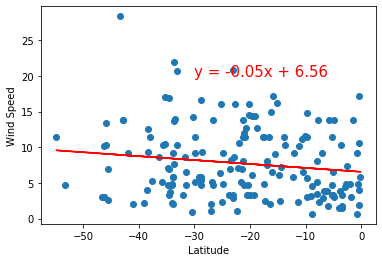

In [75]:
plt.scatter(South_df["Lat"],South_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
re = regressionfunc(South_df["Lat"],South_df["Wind Speed"])
rval = re[2]
plt.plot(South_df["Lat"],re[5],"r-")
plt.annotate(re[6],(-30,20),fontsize=15,color="red")
print(f"The r-squared is : {rval**2}")
plt.savefig("../output_data/SLat_Wind.png")

In [ ]:
#No relationship between latitude and wind speed.

In [62]:
City_df.to_csv("../output_data/city.csv")

In [ ]:


#1. Based on the City Latitude vs. Max Temperature chart , Cities between -40 to +40 latitude have hotter temperatures than anywhere else.
#As latitude increases temperature is colder.

# 2. Based on the Northern Hemisphere - Max Temp vs. Latitude Linear Regression chart, Negative relashionship between northern hemishphere latitude and teperature.

# 3. Based on the Southern Hemisphere - Max Temp vs. Latitude Linear Regression chart, Positive relationship between Souther hemishpere and temperature. as the latitude increases temperature increases.




